# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Apple/train",
    label_mode="categorical",
    class_names=['Apple Black rot', 'Apple Scab Leaf', 'Apple leaf Healthy', 'Apple rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Apple/valid",
    label_mode="categorical",
    class_names=['Apple Black rot', 'Apple Scab Leaf', 'Apple leaf Healthy', 'Apple rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 8014 files belonging to 4 classes.
==========================Validation Data====================
Found 1943 files belonging to 4 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Dataset/Apple/train",
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Dataset/Apple/valid",
                                                         batch_size=1,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 8014 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


# Model Non Augmented Evaluating

## Model Dense121 Version 1 Apple Non Augmented

In [4]:
# Load model
Dense_Non_Aug1 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DenseNet_model1_Based_Non_Augmented')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug1 = Dense_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 44s 20ms/step - loss: 0.0020 - accuracy: 0.9995
Accuracy: 99.948531%
Loss: 0.203077%


==========================Confusion Matrix====================
1943/1943 [==============================] - 38s 19ms/step


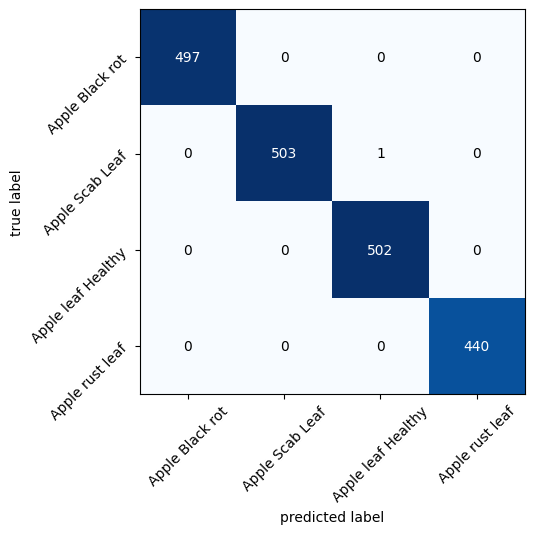

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [6]:
# Confusion Matrix and Classification Report
target_names = ['Apple Black rot', 'Apple Scab Leaf', 'Apple leaf Healthy', 'Apple rust leaf']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Model Dense121 Version 2 Apple Non Augmented

In [7]:
# Load model
Dense_Non_Aug2 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DenseNet_model2_Based_Non_Augmented')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug2 = Dense_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 41s 20ms/step - loss: 0.0027 - accuracy: 0.9995
Accuracy: 99.948531%
Loss: 0.269691%


==========================Confusion Matrix====================
1943/1943 [==============================] - 38s 19ms/step


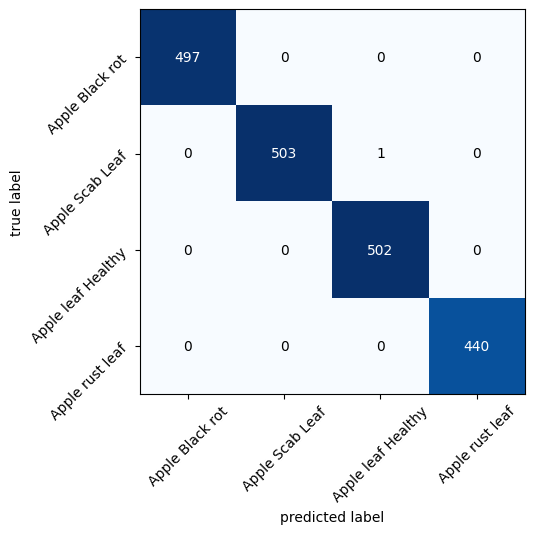

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [9]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 1 Apple Non Augmented

In [10]:
# Load model
Mobile_Non_Aug1 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_MobileNetV2_model1_Based_Non_Augmented')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug1 = Mobile_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 20s 10ms/step - loss: 0.0050 - accuracy: 0.9995
Accuracy: 99.948531%
Loss: 0.504965%


==========================Confusion Matrix====================
1943/1943 [==============================] - 17s 8ms/step


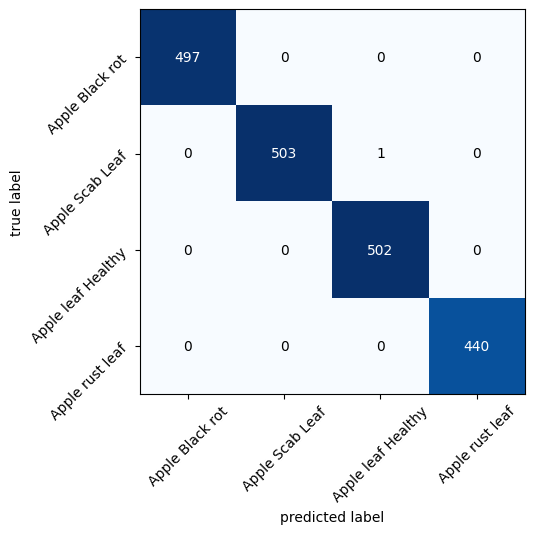

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 2 Apple Non Augmented

In [13]:
# Load model
Mobile_Non_Aug2 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_MobileNetV2_model2_Based_Non_Augmented')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug2 = Mobile_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 19s 9ms/step - loss: 8.7940e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.087940%


==========================Confusion Matrix====================
1943/1943 [==============================] - 17s 8ms/step


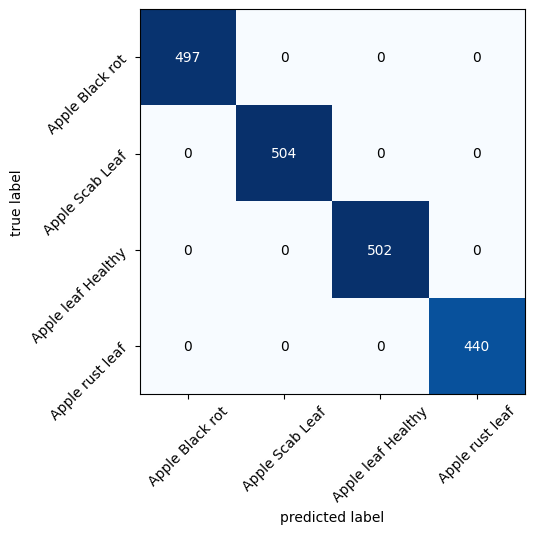

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 1 Apple Non Augmented

In [17]:
# Load model
DIY_Non_Aug1 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DIY_model1_Based_Non_Augmented')

In [18]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug1 = DIY_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 7s 3ms/step - loss: 0.1253 - accuracy: 0.9696
Accuracy: 96.963459%
Loss: 12.530023%


==========================Confusion Matrix====================
1943/1943 [==============================] - 4s 2ms/step


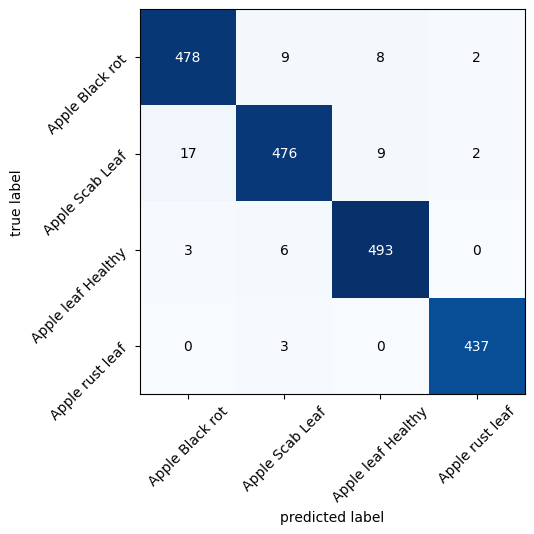

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       0.96      0.96      0.96       497
   Apple Scab Leaf       0.96      0.94      0.95       504
Apple leaf Healthy       0.97      0.98      0.97       502
   Apple rust leaf       0.99      0.99      0.99       440

          accuracy                           0.97      1943
         macro avg       0.97      0.97      0.97      1943
      weighted avg       0.97      0.97      0.97      1943



In [19]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 2 Apple Non Augmented

In [20]:
# Load model
DIY_Non_Aug2 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DIY_model2_Based_Non_Augmented')

In [21]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug2 = DIY_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 9s 4ms/step - loss: 0.1356 - accuracy: 0.9789
Accuracy: 97.889858%
Loss: 13.559733%


==========================Confusion Matrix====================
1943/1943 [==============================] - 6s 3ms/step


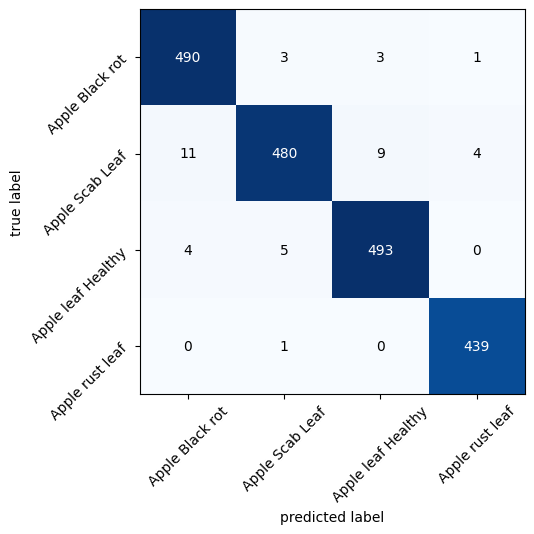

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       0.97      0.99      0.98       497
   Apple Scab Leaf       0.98      0.95      0.97       504
Apple leaf Healthy       0.98      0.98      0.98       502
   Apple rust leaf       0.99      1.00      0.99       440

          accuracy                           0.98      1943
         macro avg       0.98      0.98      0.98      1943
      weighted avg       0.98      0.98      0.98      1943



In [22]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 1 Apple Non Augmented

In [23]:
# Load model
Xception_Non_Aug1 = tf.keras.models.load_model("Modelling/Apple/Non Augmented/Saved Model/Apple_Xception_model1_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug1 = Xception_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 22s 10ms/step - loss: 6.2605e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.062605%


==========================Confusion Matrix====================
1943/1943 [==============================] - 17s 9ms/step


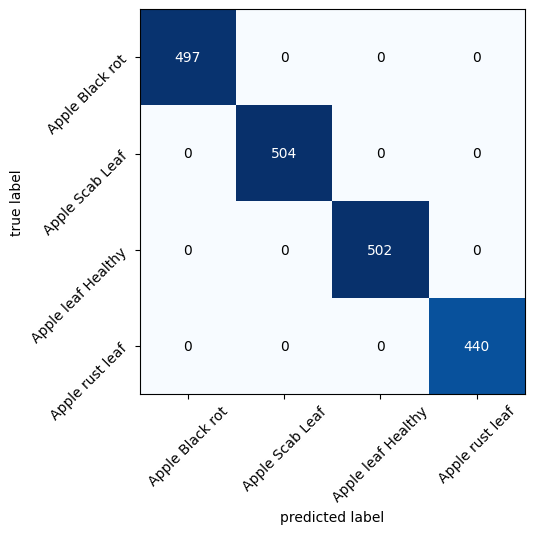

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [25]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 2 Apple Non Augmented

In [26]:
# Load model
Xception_Non_Aug2 = tf.keras.models.load_model("Modelling/Apple/Non Augmented/Saved Model/Apple_Xception_model2_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug2 = Xception_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 21s 11ms/step - loss: 3.3826e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.033826%


==========================Confusion Matrix====================
1943/1943 [==============================] - 18s 9ms/step


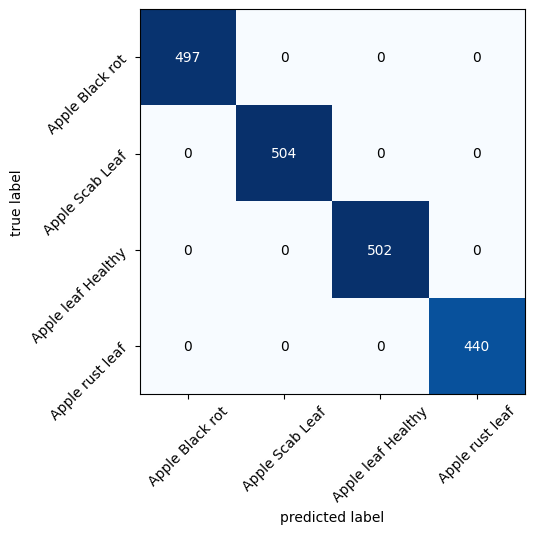

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [28]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Model Augmented Evaluating

## Model Dense121 Version 1 Apple Augmented

In [29]:
# Load model
Dense_Aug1 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_DenseNet_model1_Based_Augmented')

In [30]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug1 = Dense_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 41s 21ms/step - loss: 6.5022e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.065022%


==========================Confusion Matrix====================
1943/1943 [==============================] - 38s 19ms/step


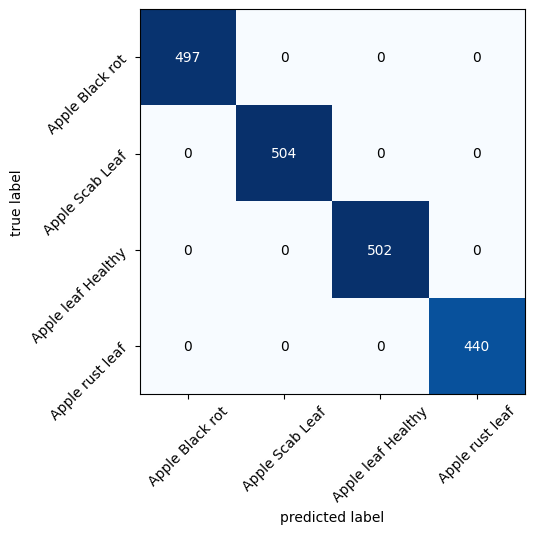

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [31]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Model Dense121 Version 2 Apple Augmented

In [32]:
# Load model
Dense_Aug2 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_DenseNet_model2_Based_Augmented')

In [33]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug2 = Dense_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 40s 20ms/step - loss: 6.7529e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.067529%


==========================Confusion Matrix====================
1943/1943 [==============================] - 38s 19ms/step


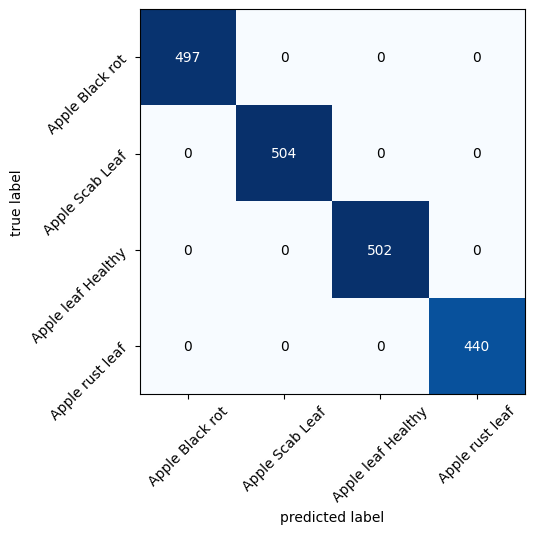

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [34]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 1 Apple Non Augmented

In [35]:
# Load model
Mobile_Aug1 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_MobileNetV2_model1_Based_Augmented')

In [36]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug1 = Mobile_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 19s 9ms/step - loss: 0.0010 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.102572%


==========================Confusion Matrix====================
1943/1943 [==============================] - 16s 8ms/step


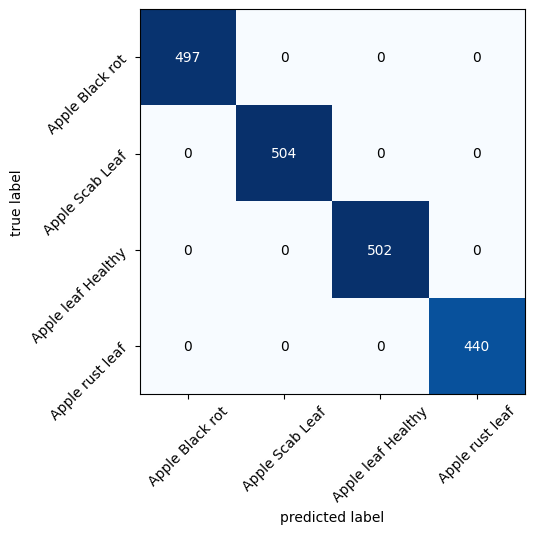

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [37]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## MobileNet V2 Version 2 Apple Non Augmented

In [38]:
# Load model
Mobile_Aug2 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_MobileNetV2_model2_Based_Augmented')

In [39]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug2 = Mobile_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 19s 10ms/step - loss: 2.9708e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.029708%


==========================Confusion Matrix====================
1943/1943 [==============================] - 16s 8ms/step


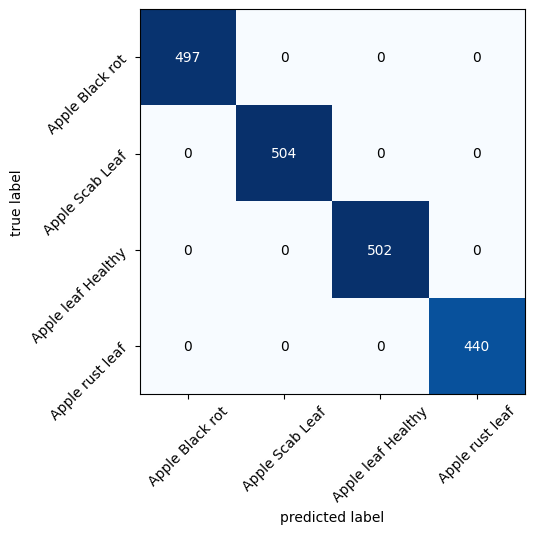

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [40]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 1 Apple Augmented

In [41]:
# Load model
Xception_Aug1 = tf.keras.models.load_model("Modelling/Apple/Augmented/Saved Model/Apple_Xception_model1_Based_Augmented.h5", compile=False)
Xception_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug1 = Xception_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 21s 11ms/step - loss: 4.1171e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.041171%


==========================Confusion Matrix====================
1943/1943 [==============================] - 17s 9ms/step


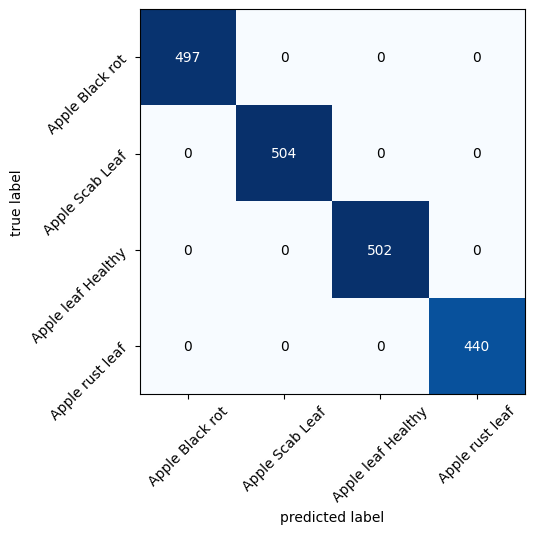

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [43]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## Xception Version 2 Apple Augmented

In [44]:
# Load model
Xception_Aug2 = tf.keras.models.load_model("Modelling/Apple/Augmented/Saved Model/Apple_Xception_model2_Based_Augmented.h5", compile=False)
Xception_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug2 = Xception_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 22s 11ms/step - loss: 0.0023 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.233346%


==========================Confusion Matrix====================
1943/1943 [==============================] - 17s 9ms/step


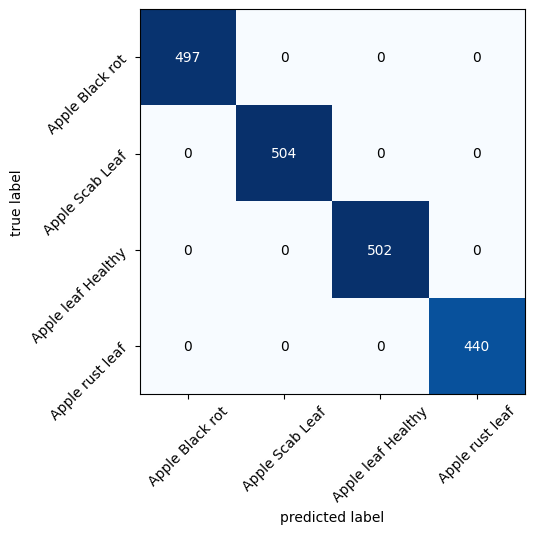

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [46]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 1 Apple Augmented

In [47]:
# Load model
DIY_Aug1 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_DIY_model1_Based_Augmented')

In [48]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug1 = DIY_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug1[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 7s 4ms/step - loss: 0.0063 - accuracy: 0.9985
Accuracy: 99.845600%
Loss: 0.634219%


==========================Confusion Matrix====================
1943/1943 [==============================] - 4s 2ms/step


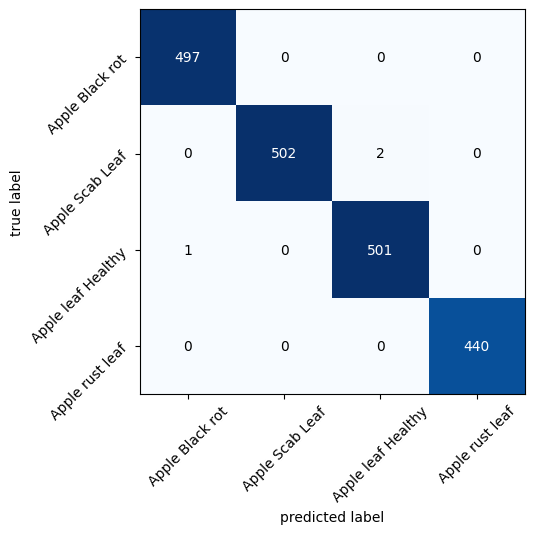

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      1.00      1.00       504
Apple leaf Healthy       1.00      1.00      1.00       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           1.00      1943
         macro avg       1.00      1.00      1.00      1943
      weighted avg       1.00      1.00      1.00      1943



In [49]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

## DIY Version 2 Apple Augmented

In [50]:
# Load model
DIY_Aug2 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_DIY_model2_Based_Augmented')

In [51]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug2 = DIY_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug2[0]*100))

==========================Evaluate Model====================
1943/1943 [==============================] - 8s 4ms/step - loss: 0.0222 - accuracy: 0.9938
Accuracy: 99.382401%
Loss: 2.223116%


==========================Confusion Matrix====================
1943/1943 [==============================] - 6s 3ms/step


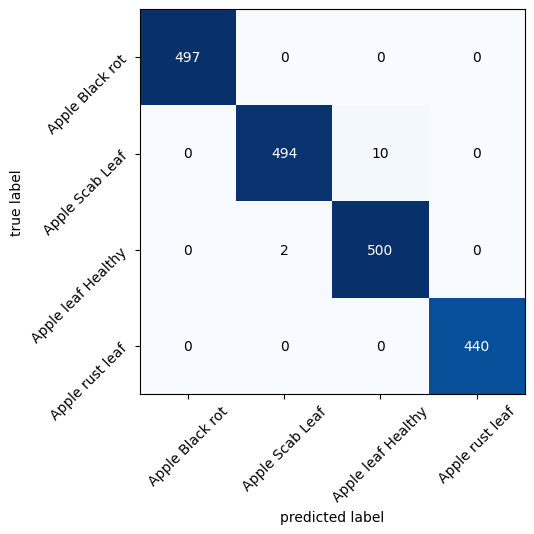

==========================Classification Report====================
Classification Report
                    precision    recall  f1-score   support

   Apple Black rot       1.00      1.00      1.00       497
   Apple Scab Leaf       1.00      0.98      0.99       504
Apple leaf Healthy       0.98      1.00      0.99       502
   Apple rust leaf       1.00      1.00      1.00       440

          accuracy                           0.99      1943
         macro avg       0.99      0.99      0.99      1943
      weighted avg       0.99      0.99      0.99      1943



In [52]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Compare All

In [53]:
# Make dictionary of all models
models = {
    "Dense_Non_Aug1": Dense_Non_Aug1,
    "Dense_Non_Aug2": Dense_Non_Aug2,
    "Mobile_Non_Aug1": Mobile_Non_Aug1,
    "Mobile_Non_Aug2": Mobile_Non_Aug2,
    "DIY_Non_Aug1": DIY_Non_Aug1,
    "DIY_Non_Aug2": DIY_Non_Aug2,
    "Xception_Non_Aug1": Xception_Non_Aug1,
    "Xception_Non_Aug2": Xception_Non_Aug2,
    "Dense_Aug1": Dense_Aug1,
    "Dense_Aug2": Dense_Aug2,
    "Mobile_Aug1": Mobile_Aug1,
    "Mobile_Aug2": Mobile_Aug2,
    "Xception_Aug1": Xception_Aug1,
    "Xception_Aug2": Xception_Aug2,
    "DIY_Aug1": DIY_Aug1,
    "DIY_Aug2": DIY_Aug2
}

# Make dictionary of all accuracy scores
accuracy = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[1],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[1],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[1],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[1],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[1],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[1],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[1],
    "Dense_Aug1": scores_Dense_Aug1[1],
    "Dense_Aug2": scores_Dense_Aug2[1],
    "Mobile_Aug1": scores_Mobile_Aug1[1],
    "Mobile_Aug2": scores_Mobile_Aug2[1],
    "Xception_Aug1": scores_Xception_Aug1[1],
    "Xception_Aug2": scores_Xception_Aug2[1],
    "DIY_Aug1": scores_DIY_Aug1[1],
    "DIY_Aug2": scores_DIY_Aug2[1]
}

# Make dictionary of all loss scores
loss = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[0],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[0],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[0],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[0],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[0],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[0],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[0],
    "Dense_Aug1": scores_Dense_Aug1[0],
    "Dense_Aug2": scores_Dense_Aug2[0],
    "Mobile_Aug1": scores_Mobile_Aug1[0],
    "Mobile_Aug2": scores_Mobile_Aug2[0],
    "Xception_Aug1": scores_Xception_Aug1[0],
    "Xception_Aug2": scores_Xception_Aug2[0],
    "DIY_Aug1": scores_DIY_Aug1[0],
    "DIY_Aug2": scores_DIY_Aug2[0]
}

# Make dataframe of all models, accuracy and loss
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values())), columns =['Model', 'Accuracy', 'Loss'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model  Accuracy      Loss
3     Mobile_Non_Aug2  1.000000  0.000879
6   Xception_Non_Aug1  1.000000  0.000626
7   Xception_Non_Aug2  1.000000  0.000338
8          Dense_Aug1  1.000000  0.000650
9          Dense_Aug2  1.000000  0.000675
10        Mobile_Aug1  1.000000  0.001026
11        Mobile_Aug2  1.000000  0.000297
12      Xception_Aug1  1.000000  0.000412
13      Xception_Aug2  1.000000  0.002333
1      Dense_Non_Aug2  0.999485  0.002697
2     Mobile_Non_Aug1  0.999485  0.005050
14           DIY_Aug1  0.998456  0.006342
15           DIY_Aug2  0.993824  0.022231
5        DIY_Non_Aug2  0.978899  0.135597
4        DIY_Non_Aug1  0.969635  0.125300
0      Dense_Non_Aug1  0.002031  0.002031


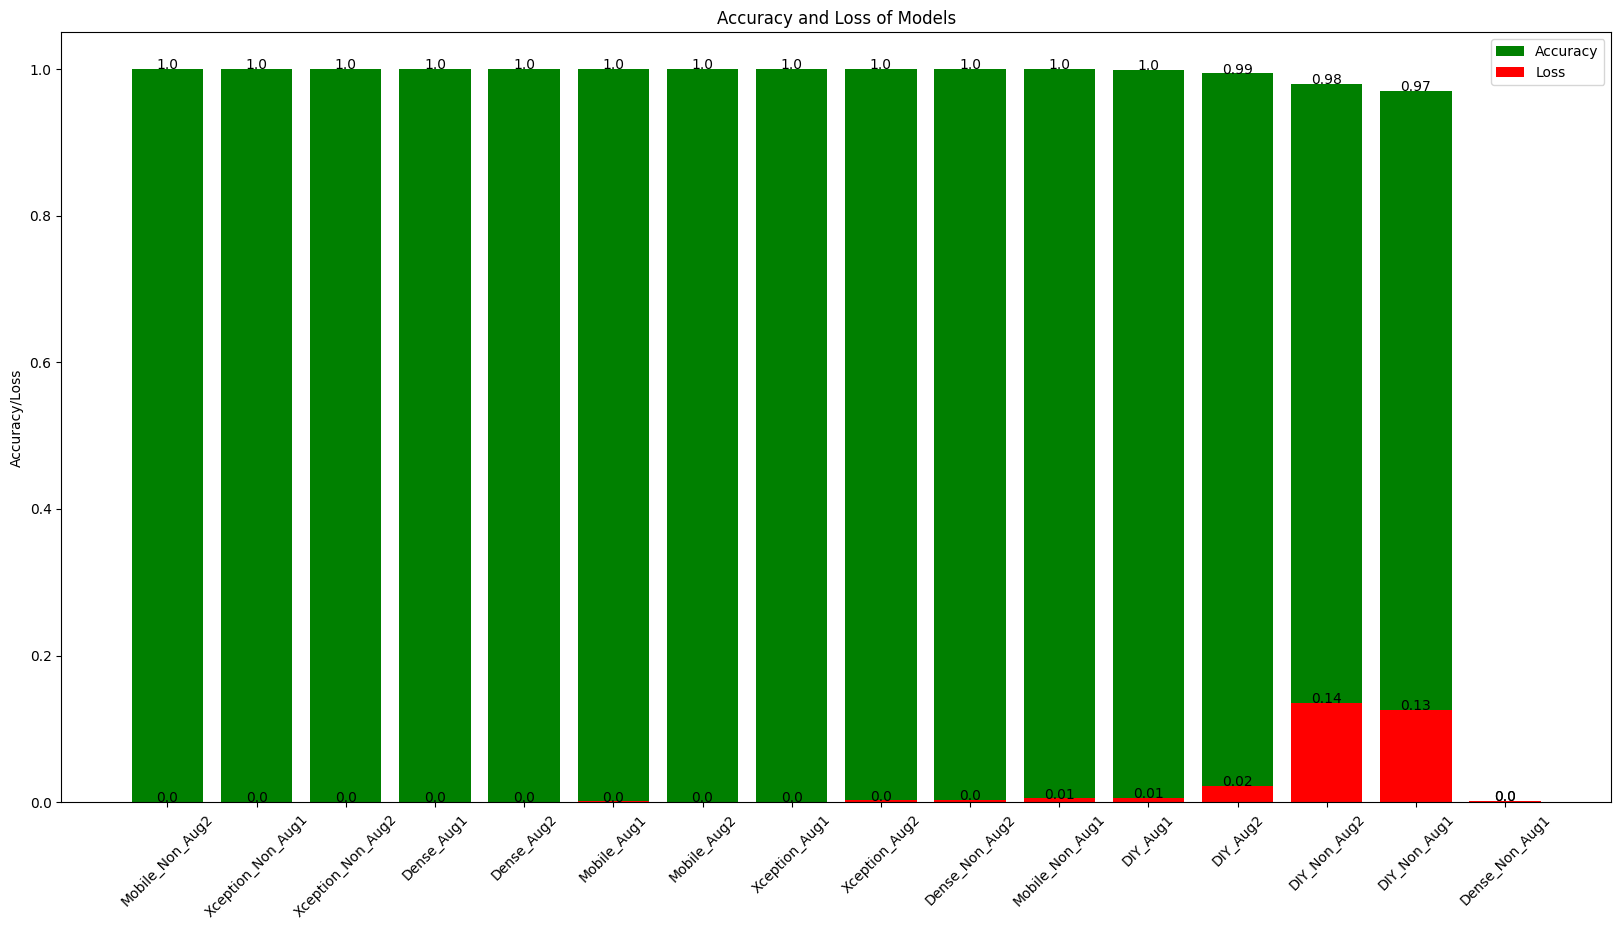

In [54]:
# Make bar chart of all models, accuracy and loss with annotations
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df['Model'], df['Accuracy'], color='green')
ax.bar(df['Model'], df['Loss'], color='red')
ax.set_xticklabels(df['Model'], rotation=45)
ax.set_ylabel('Accuracy/Loss')
ax.set_title('Accuracy and Loss of Models')
ax.legend(['Accuracy', 'Loss'])
for i, v in enumerate(df['Accuracy']):
    ax.text(i, v, str(round(v, 2)), color='black', ha="center")
for i, v in enumerate(df['Loss']):
    ax.text(i, v, str(round(v, 2)), color='black', ha="center")
plt.show()